# Undiagnosed ADHD Classification
by [Matthew Turner](https://www.linkedin.com/in/matthew-turner-a5649a21b/)

# Introduction

ADHD is a developmental disorder associated with an ongoing pattern of inattention, hyperactivity, and/or impulsivity.
The symptoms of ADHD can interfere significantly with an individual’s daily activities and relationships.
ADHD symptoms begin in childhood [and worsen in the teen years and adulthood](https://www.nimh.nih.gov/health/publications/adhd-what-you-need-to-know#part_6209).

People with ADHD experience an ongoing pattern of the following types of symptoms:

- Inattention–having difficulty paying attention
- Hyperactivity–having too much energy or moving and talking too much
- Impulsivity–acting without thinking or having difficulty with self-control

Some people with ADHD mainly have symptoms of inattention. Others mostly have symptoms of hyperactivity-impulsivity.
Some people have both types of symptoms.

ADHD comes in many forms and severities, and teenagers and adults who are undiagnosed often don't even consider they may
have ADHD if their symptoms don't perfectly match stereotypes of ADHD in the media.


## Problem

As established above, Undiagnosed ADHD can be difficult for those with it. But why is it [so common](https://www.singlecare.com/blog/news/adhd-statistics/#adult-adhd-statistics) for ADHD to go undiagnosed?

Personally, I think this is a multi-pronged issue:

**ADHD is not well understood.**
ADHD is still a [subject of heavy research](https://www.cdc.gov/ncbddd/adhd/research.html) in the science/medical field. Currently, we do not know what causes ADHD, but we know there is some genetic component involved. There is no blood test or any kind of empirical way to test for ADHD; it can only be diagnosed through observation of its symptoms.

**The way ADHD is Diagnosed.**
To be diagnosed with ADHD, you would have to specifically bring it up with your doctor; this means that if you don't suspect you have it, you may never bring it up to your doctor on your own. ADHD is diagnosed by a doctor [asking a series of questions](https://www.cdc.gov/ncbddd/adhd/diagnosis.html) relating to long-term behavioral patterns at home, so it would be difficult for a doctor to notice ADHD symptoms during a regular visit.

**The way ADHD is portrayed**
People with ADHD are typically portrayed as young kids, who are extremely hyper-active and disobedient. However, hyperactivity is only one component of ADHD, and it expresses itself in various ways. Especially as kids grow older, hyperactivity can [look very different](https://www.nytimes.com/2010/12/14/health/14klass.html) from what is portrayed in media/pop culture. This results in individuals rejecting the idea that they, or someone they know, has ADHD because their symptoms don't look like stereotypical ADHD symptoms.

So, is there a solution that can be reliably used that **doesn't require a deep understanding of ADHD**, and could help spread awareness that a person may have ADHD regardless of any **personal** or **societal** bias towards what ADHD looks like?


Such a solution would greatly benefit individuals with undiagnosed ADHD, and help push people towards getting a diagnoses. There are lots of "ADHD self-tests" on the internet, but they are questionable at best, and misleading at worst. If our hypothetical solution also used **real data** from those diagnosed with ADHD, it would definitely give it more weight as a solution.

Where human perception fails, a machine can excel. Machine learning is the perfect solution for this kind of problem. An AI **doesn't need a deep understanding** of a subject to recognize underlying patterns, and **it doesn't care** about any personal bias, or what ADHD "should" look like according to society. The nature of machine learning also means it would **need to use real data**, But does a data source like that even exist?

## Data

The [NSCH](https://www.census.gov/programs-surveys/nsch/data/datasets.html) is a household survey that produces national and state-level data on the physical and emotional health of children 0 - 17 years old in the United States. Since 2016, the NSCH has been an annual survey. The survey supports national estimates every year and state-level estimates by combining 2 or 3 years of data. In this project I would primarily look at the 2020 data.

The survey collects information related to the health and well-being of children, including access to and use of health care, family interactions, parental health, school and after-school experiences, and neighborhood characteristics. A parent or other adult caregiver with knowledge of the sampled child’s health and health care filled out the topical questionnaire.

Survey topics include:
- Child and family characteristics
- **Physical and mental health status, including current conditions and functional difficulties**
- Health insurance status, type, and adequacy
- Access and use of health care services
- Medical, dental, and specialty care needed and received
- Family health and activities
- Impact of child’s health on family
- Neighborhood characteristics

## Goal
In the NSCH data is a question that asks:
- Has a doctor or other health care provider EVER told you that this child has…
   Attention Deficit Disorder or Attention-Deficit/Hyperactivity Disorder, that is, ADD or ADHD?

For this project, I'm going create a tool that can give the probability that a child from the survey has ADHD, **but is undiagnosed**.

One distinction I'd like to make: **This project is not about diagnosing kids with ADHD**. Only a trained medical professional can diagnose someone with ADHD. This project and it's results are about spreading awareness.


# Data Understanding
As mentioned above, the [NSCH](https://www.census.gov/programs-surveys/nsch/data/datasets.html) is a household survey that produces national and state-level data on the physical and emotional health of children 0 - 17 years old in the United States. It is performed by the US Census Bureau, and an extremely detailed [methodology report](https://www2.census.gov/programs-surveys/nsch/technical-documentation/methodology/2020-NSCH-Methodology-Report.pdf) is included with the data.

As a Data scientist I need to ask myself:

**Is this data suitable for our goal, and what kind of limitations does it have?**

The most important thing about this data, is that it is representative of the population as a whole. Starting on page 8 of the methodology report, there is a detailed explanation of the collection methods used to gather this data. In summary, modifications were made to this data to ensure it was representative of the overall population.

Let's begin taking a look at the data, with the knowledge that it accurately represents the population as a whole.

## Exploratory Data Analysis
The following section is a shortened version of this [notebook](/Notebooks/EDA.ipynb).

Lets investigate and visualize some aspects of our data to help our understanding:

- Distribution of kids Diagnosed with ADHD
- Distribution of gender/sex among children diagnosed with ADHD
- Distribution of race/ethnicity of children diagnosed with ADHD
- Age/age groups of kids diagnosed with ADHD
- Correlations of the target column to other columns in the dataset


### Loading and Exploring the Data
Lets first load and explore the data, and confirm its size and shape.

In [41]:
# Import statements
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn's visual style
sns.set_style('white')

In [42]:
# Loading data into pandas dateframe
nsch = pd.read_sas('Data/nsch_2020_topical_SAS/nsch_2020_topical.sas7bdat')

# Visually checking successful loading of dataframe
nsch.head()

/Users/matthewturner/opt/anaconda3/envs/Capstone/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,BIRTH_YR_F,BMICLASS,HHCOUNT_IF,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,FWC
0,b'17',b'1',b'20000003',b'T1',2.0,1.0,1.0,3.0,1.0,NaN,...,0.0,NaN,0.0,400.0,400.0,400.0,400.0,400.0,400.0,3296.080092
1,b'29',b'2A',b'20000004',b'T3',1.0,1.0,1.0,14.0,2.0,NaN,...,0.0,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2888.545330
2,b'47',b'1',b'20000005',b'T1',1.0,1.0,1.0,1.0,2.0,NaN,...,0.0,NaN,0.0,400.0,400.0,400.0,400.0,400.0,400.0,1016.682730
3,b'28',b'1',b'20000014',b'T3',2.0,1.0,1.0,15.0,2.0,NaN,...,0.0,2.0,0.0,143.0,143.0,143.0,143.0,143.0,143.0,1042.091065
4,b'55',b'1',b'20000015',b'T3',2.0,2.0,1.0,16.0,2.0,NaN,...,0.0,3.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,402.372392


### Data Shape

In [43]:
# Getting shape of data frame and assigning to variables
total_rows, total_columns = nsch.shape

print(f'There are {total_rows} completed surveys')
print(f'There are {total_columns} questions in the survey')

There are 42777 completed surveys
There are 443 questions in the survey


The [Methodology Report](https://www2.census.gov/programs-surveys/nsch/technical-documentation/methodology/2020-NSCH-Methodology-Report.pdf) for this survey states that they ***reached out to 240,000 house holds, and 93,000 completed a screener survey**.

They also state that **of those 93,000 households, 51,107 are included in the public use file**, however, of the 51,107 households **only 42,777 submitted a complete survey**. So our numbers match up with what is in the report.

### ADHD Distribution

Our target column for prediction will be "K2Q31A", which says:


> "Has a doctor or other health care provider EVER told you that this child has Attention Deficit Disorder or Attention-Deficit/Hyperactivity Disorder, that is, ADD or ADHD?"

Lets visualize its distribution.

90% of kids in this sample have not been diagnosed ADHD.
10% of kids in this sample have been diagnosed ADHD.


/Users/matthewturner/opt/anaconda3/envs/Capstone/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


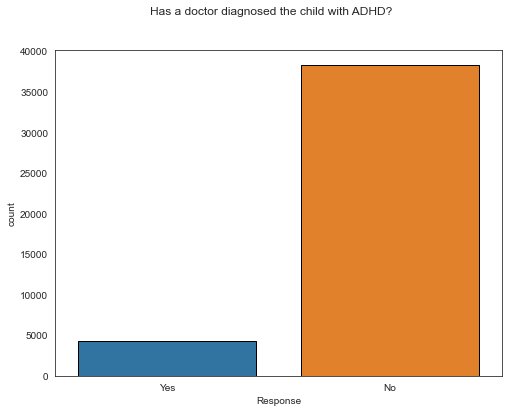

In [44]:
# Replacing numbers with words for easier plotting
adhd_yn = nsch['K2Q31A'].replace({1: 'Yes', 2: 'No'})

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
adhd_figure = sns.countplot(adhd_yn, ax=ax, edgecolor='black', order=['Yes', 'No'])
plt.suptitle('Has a doctor diagnosed the child with ADHD?')
adhd_figure.set(xlabel='Response')


# Percentages of kids with ADHD
no_adhd_p, yes_adhd_p = adhd_yn.value_counts(normalize=True)

print(f'{no_adhd_p*100:.0f}% of kids in this sample have not been diagnosed ADHD.')
print(f'{yes_adhd_p*100:.0f}% of kids in this sample have been diagnosed ADHD.')


#### Analysis
It is hard to try and compare this to an overall estimate of ADHD among the overall population, since most studies use this survey as a basis for estimation. It is important to note that kids with special health care needs have been super-sampled when the data was collected. The actual population of kids diagnosed with ADHD, most likely, does not look like this. We have an incredibly small amount of kida actually diagnosed with ADHD, and this lack of data may prove a challenge later when modeling.

Now that we have this information, let's look into these 4306 kids and look at some relationships between other columns

### ADHD Diagnoses and Gender
Lets investigate the relationship between a child's sex and ADHD diagnoses

/var/folders/y8/vq429chs6djb0hl0y0zp5fg00000gn/T/ipykernel_31032/1839714010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['SC_SEX'] = adhd_df['SC_SEX'].replace({1: 'Male', 2: 'Female'})
/Users/matthewturner/opt/anaconda3/envs/Capstone/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


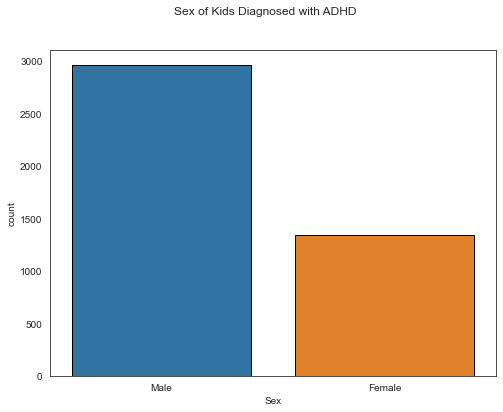

In [45]:
# Grab a dataframe with only ADHD diagnosed kids
adhd_df = nsch[nsch['K2Q31A'] == 1]

# Replace numbers with "Male" and "Female" for easier plotting
adhd_df['SC_SEX'] = adhd_df['SC_SEX'].replace({1: 'Male', 2: 'Female'})

# Plotting
sex_fig, sex_ax = plt.subplots(figsize=(8, 6))
adhd_sex_figure = sns.countplot(adhd_df['SC_SEX'], ax=sex_ax, edgecolor='black', order=['Male', 'Female'])
plt.suptitle('Sex of Kids Diagnosed with ADHD')
adhd_sex_figure.set(xlabel='Sex');

In [46]:
# Get normalized value counts of Sex
male_p, female_p = adhd_df['SC_SEX'].value_counts(normalize=True)

# Print percentages rounded to the nearest whole number.
print(f' Of all the kids with ADHD in our sample {male_p*100:.0f}% are male, and {female_p*100:.0f}% are female')

 Of all the kids with ADHD in our sample 69% are male, and 31% are female


### Analysis
These results match up with the Census Bueraus findings that males are more likley to be diagnosed with ADHD then females are. ADHD and sex is a subject of ongoing research, and I highly suggest reading [this](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6923191/) study on the subject matter for an in-depth look on the matter.

### ADHD and Age
Now to investigate the ages of those with ADHD.

/var/folders/y8/vq429chs6djb0hl0y0zp5fg00000gn/T/ipykernel_31032/2208899985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['FORMTYPE'] = adhd_df['FORMTYPE'].astype('str').replace({"b'T1'": 'Group 1 (0-5)', "b'T2'": 'Group 2 (6-11)', "b'T3'": 'Group 3 (12-17)'})


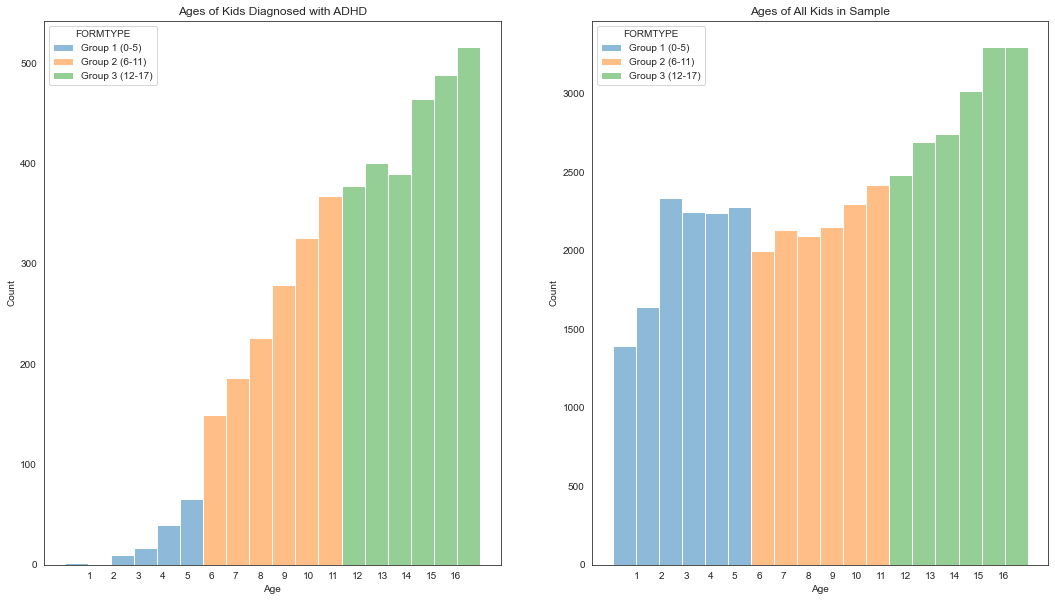

In [47]:
# Replacing formtype category names for more readable graphs
adhd_df['FORMTYPE'] = adhd_df['FORMTYPE'].astype('str').replace({"b'T1'": 'Group 1 (0-5)', "b'T2'": 'Group 2 (6-11)', "b'T3'": 'Group 3 (12-17)'})
nsch['FORMTYPE'] = nsch['FORMTYPE'].astype('str').replace({"b'T1'": 'Group 1 (0-5)', "b'T2'": 'Group 2 (6-11)', "b'T3'": 'Group 3 (12-17)'})

# Set figure and axis
agefig, (ageax, realax) = plt.subplots(1, 2, figsize=(18, 10))

# Plot figure with 18 bins (ages go from 1-17) with an extra bin for aesthetic reasons
age_figure = sns.histplot(data=adhd_df, x='SC_AGE_YEARS', ax=ageax, bins=18, hue='FORMTYPE', hue_order=['Group 1 (0-5)', 'Group 2 (6-11)', 'Group 3 (12-17)'])
real_figure = sns.histplot(data=nsch, x='SC_AGE_YEARS', ax=realax, bins=18, hue='FORMTYPE', hue_order=['Group 1 (0-5)', 'Group 2 (6-11)', 'Group 3 (12-17)'])

# Setting labels, title, and ticks.
age_figure.set(title='Ages of Kids Diagnosed with ADHD', xlabel='Age', xticks=list(range(1, 17)))
real_figure.set(title='Ages of All Kids in Sample', xlabel='Age', xticks=list(range(1, 17)));


#### Analysis
The above graphs make sense to me in context of our data, ADHD is more easily noticeable as children are asked to perform more complex tasks in school. Though it will be important to remember that the resulting model will have a harder time with children in group 1 since there are far less of them.

### Racial Distribution of ADHD Diagnoses

/var/folders/y8/vq429chs6djb0hl0y0zp5fg00000gn/T/ipykernel_31032/2575209394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adhd_df['SC_RACE_R'] = adhd_df['SC_RACE_R'].replace({ 1: 'White', 2: 'Black', 3: 'Native Amer.', 4: 'Asian', 5:'Hawaiian', 7: 'Mixed'})


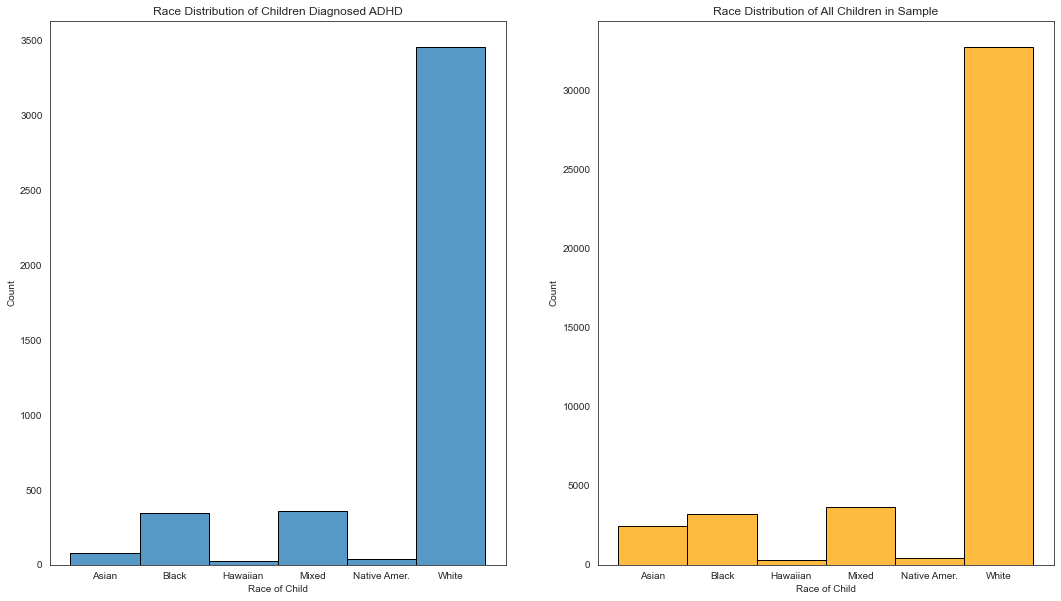

In [48]:
# Replacing formtype category names for more readable graphs
adhd_df['SC_RACE_R'] = adhd_df['SC_RACE_R'].replace({ 1: 'White', 2: 'Black', 3: 'Native Amer.', 4: 'Asian', 5:'Hawaiian', 7: 'Mixed'})
nsch['SC_RACE_R'] = nsch['SC_RACE_R'].replace({ 1: 'White', 2: 'Black', 3: 'Native Amer.', 4: 'Asian', 5:'Hawaiian', 7: 'Mixed'})

# Creating figure and axes
racefig, (adhd_race_ax, sample_race_ax) = plt.subplots(1, 2, figsize=(18, 10))

# Plotting racial distribution of kids diagnosed with ADHD
adhd_race_figure = sns.histplot(adhd_df.sort_values('SC_RACE_R'), x='SC_RACE_R', ax=adhd_race_ax, edgecolor='black')

# Setting xlabel and title
adhd_race_figure.set(xlabel='Race of Child', title='Race Distribution of Children Diagnosed ADHD')

# Plotting racial distribution of sample
sample_race_figure = sns.histplot(nsch.sort_values('SC_RACE_R'), x='SC_RACE_R', ax=sample_race_ax, color='orange', edgecolor='black')

# Setting xlabel and title
sample_race_figure.set(xlabel='Race of Child', title='Race Distribution of All Children in Sample');

#### Analysis
The distributions seem to match except for one small quirk, there are only about half the amount of asian kids we would expect. I will refrain from simply guessing why this could be, but it will be important to note this aspect of the data. It is also important to note that the distribution of our overall data does not match the [overall estimates](https://www.census.gov/quickfacts/fact/table/US/PST045219) for the United States. This will be another limitation of my data.


### EDA Summary

The limitations of this data are:

There are **4306 children** in this sample have been **diagnosed** with ADHD.
<br>

**10%** of kids in this sample have been **diagnosed** ADHD.
<br>

Of these kids, **69% are male**, and **31% are female**
<br>

of the kids diagnosed with ADHD,
   - **61%** are between the ages of **12-17**
   - **36%** are between the ages of **6-11**
   - **3%** are between the ages of **0-5**

The Racial/Ethnic distribution of children with ADHD is:

| Race        | Percentage  |
| ----------- | ----------- |
| White       | 80%         |
| Black       | 8%          |
| Asian       | 2%          |
| Mixed       | 8%          |
| Native Am.  | 0.009%      |
| Hawaiian    | 0.006%      |

<br>

#### Why These Things Matter
This data is important, because my model is only as good as my data. These are some clear, defined limitations of my data. When modeling it will be important to remember that my model will be good at diagnosing white males between the ages of 12-17. This is because that is what I have the most data for. My model may struggle to correctly classify female, or non-white kids when it comes to ADHD. It's important to be transparent about these things, and also to remember that using the data as it is will mean reinforcing any bias that is already present in the data.

# Data Cleaning
Data file can specifically be found [here](https://www.census.gov/programs-surveys/nsch/data/datasets.html)

To prepare the data for cleaning I will:
- Remove columns related to ADHD
- Ensure all NaN values present in the dataset are addressed
- Perform a train-test split on the data and create a holdout set as well.
- Save transformed/cleaned data as CSV files.

The full cleaning notebook can be found [here](/Notebooks/Data_Cleaning.ipynb)

In [49]:
# Imports for this section
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [50]:
# reloading data into pandas dateframe to undo any previous changes.
nsch = pd.read_sas('Data/nsch_2020_topical_SAS/nsch_2020_topical.sas7bdat')

# Visually checking successful loading of dataframe
nsch.head()

/Users/matthewturner/opt/anaconda3/envs/Capstone/lib/python3.9/site-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,BIRTH_YR_F,BMICLASS,HHCOUNT_IF,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,FWC
0,b'17',b'1',b'20000003',b'T1',2.0,1.0,1.0,3.0,1.0,NaN,...,0.0,NaN,0.0,400.0,400.0,400.0,400.0,400.0,400.0,3296.080092
1,b'29',b'2A',b'20000004',b'T3',1.0,1.0,1.0,14.0,2.0,NaN,...,0.0,2.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2888.545330
2,b'47',b'1',b'20000005',b'T1',1.0,1.0,1.0,1.0,2.0,NaN,...,0.0,NaN,0.0,400.0,400.0,400.0,400.0,400.0,400.0,1016.682730
3,b'28',b'1',b'20000014',b'T3',2.0,1.0,1.0,15.0,2.0,NaN,...,0.0,2.0,0.0,143.0,143.0,143.0,143.0,143.0,143.0,1042.091065
4,b'55',b'1',b'20000015',b'T3',2.0,2.0,1.0,16.0,2.0,NaN,...,0.0,3.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,402.372392


## ADHD Columns

Along with our target column, 'K2Q31A' there are multiple other columns that relate to ADHD that need to be removed. These columns are closely tied to ADHD so they need to be removed so the model doesn't take them into account when making predictions. Column descriptions can be found in the [EDA notebook](https://github.com/austint1121/Undiagnosed-ADHD-Identification/blob/main/Notebooks/EDA.ipynb). We will also save our target column, and remove any rows with null values in that column

In [51]:
# Creating list of columns to be dropped
related_ADHD = [
    'K2Q31A',
    'K2Q31B',
    'K2Q31C',
    'K2Q31D',
    'K4Q23',
    'SC_K2Q10',
    'SC_K2Q11',
    'SC_K2Q12',
    'ADDTREAT',
    'SC_CSHCN',
    'SC_K2Q22',
    'SC_K2Q10',
    'K4Q22_R',
    'K6Q15',
    'SC_K2Q20',
    'K4Q36',
    'TOTNONSHCN',
    'K4Q28X04',
]

# Dropping rows with NAN values in target column
dropped_adhd = nsch.dropna(subset=['K2Q31A'])

# Saving Target column
target = dropped_adhd['K2Q31A']

# Creating new dataframe without columns from above
dropped_adhd = dropped_adhd.drop(columns=related_ADHD)

# Confirming expected results
dropped_adhd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42589 entries, 0 to 42776
Columns: 426 entries, FIPSST to FWC
dtypes: float64(422), object(4)
memory usage: 138.7+ MB


### Binarizing Target Values
Currently in our target column a "1" means that the child has been diagnosed with ADHD and a 2 means they haven't been. This will cause problems down the road later, so I'm going to manually replace them with 0's and 1's.

In [52]:
# Dictionary for replacement
testing = {2: 0, 1: 1}

# Preforming replacement
target = target.replace(testing)

# Visually confirming expected change
target.value_counts()

0.0    38283
1.0     4306
Name: K2Q31A, dtype: int64

### Dropping Object Columns


In [53]:
# Checking the column types
dropped_adhd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42589 entries, 0 to 42776
Columns: 426 entries, FIPSST to FWC
dtypes: float64(422), object(4)
memory usage: 138.7+ MB


In [54]:
# We have 422 float64 and 4 object types. Lets investigate those 4 objects
dropped_adhd.select_dtypes('object')

,FIPSST,STRATUM,HHID,FORMTYPE
0,b'17',b'1',b'20000003',b'T1'
1,b'29',b'2A',b'20000004',b'T3'
2,b'47',b'1',b'20000005',b'T1'
3,b'28',b'1',b'20000014',b'T3'
4,b'55',b'1',b'20000015',b'T3'
...,...,...,...,...
42772,b'26',b'1',b'20239975',b'T3'
42773,b'54',b'1',b'20239979',b'T2'
42774,b'54',b'1',b'20239980',b'T3'
42775,b'15',b'1',b'20239994',b'T2'


**FIPSST** - State FIPS code
**STRATUM** - Sampling Stratum
**HHID** - Unique Household ID
**FORMTYPE** - A proxy for age, kids are given a form base on age ranges (T1: 0-5, T2: 6-11, T3:12-17)

All of these columns can be dropped as they should have an effect on whether a child has ADHD, or they are a proxy for an already present variable.

In [55]:
# Dropping object columns
dropped_final = dropped_adhd.drop(columns=['FIPSST', 'STRATUM', 'HHID', 'FORMTYPE'])
# Confirming expected column count
dropped_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42589 entries, 0 to 42776
Columns: 422 entries, TOTKIDS_R to FWC
dtypes: float64(422)
memory usage: 137.4 MB


## Train Test Split
Before doing any transformations it will be necessary to perform the train test split beforehand to prevent data leakage.

In [56]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dropped_final, target, random_state=15, stratify=target)

# Split test into a testing and final holdout/validation set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=15, stratify=y_test)

# Printing total rows in each set
print(f'Training set is {len(X_train)} entries')
print(f'Testing set is {len(X_test)} entries')
print(f'Validation set is {len(X_val)} entries')

Training set is 31941 entries
Testing set is 7986 entries
Validation set is 2662 entries


In [57]:
# Printing the amount of kids diagnosed with ADHD in each split
print(f'There are {y_train.value_counts().values[1]} kids with ADHD in the training set')
print(f'There are {y_test.value_counts().values[1]} kids with ADHD in the testing set')
print(f'There are {y_val.value_counts().values[1]} kids with ADHD in the validation set')

There are 3229 kids with ADHD in the training set
There are 808 kids with ADHD in the testing set
There are 269 kids with ADHD in the validation set


## Handling Missing Values
There are multiple strategies to handling missing values, normally I would love to use Sklearns experimental [Iterative Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) however, in this survey some questions are sub questions of others, and can be left blank as a result of the answer to the parent question.
<br>
An example of this is the "ADDTREAT" column we dropped earlier. This column is left blank if "K2Q31A" (our target) is answered "No". Instead, I'll use a simple imputer to fill in the null values with ones that will make it clear to the model that they are null values.

In [58]:
# Simple Imputer filling values with something that vill obviously be a nan value, in this case, 999
SI_imputer = SimpleImputer(strategy='constant', fill_value=999)
# Fitting the imputer to training data / transforming the training data
transformed_X_train = SI_imputer.fit_transform(X_train, y_train)

# Creating a dataframe and re-adding the column names to the data
transformed_X_train = pd.DataFrame(transformed_X_train, columns=X_train.columns)

# Visually confirming transformation
transformed_X_train.head()

,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,BIRTH_MO,BIRTH_YR,MOMAGE,K6Q41R_STILL,...,BIRTH_YR_F,BMICLASS,HHCOUNT_IF,FPL_I1,FPL_I2,FPL_I3,FPL_I4,FPL_I5,FPL_I6,FWC
0,1.0,1.0,1.0,8.0,2.0,999.0,10.0,2011.0,39.0,999.0,...,0.0,999.0,0.0,400.0,400.0,400.0,400.0,400.0,400.0,2691.769960
1,2.0,1.0,1.0,17.0,1.0,999.0,4.0,2003.0,25.0,999.0,...,0.0,4.0,1.0,400.0,400.0,400.0,400.0,319.0,400.0,3094.739915
2,2.0,1.0,1.0,16.0,1.0,2.0,7.0,2004.0,34.0,999.0,...,0.0,4.0,1.0,249.0,170.0,400.0,400.0,244.0,372.0,1557.804645
3,2.0,1.0,1.0,1.0,1.0,999.0,8.0,2019.0,36.0,999.0,...,0.0,999.0,0.0,231.0,231.0,231.0,231.0,231.0,231.0,8553.637678
4,4.0,2.0,1.0,16.0,2.0,999.0,5.0,2004.0,40.0,999.0,...,0.0,2.0,0.0,223.0,223.0,223.0,223.0,223.0,223.0,106.781469


In [59]:
# Transforming test and validation set
transformed_X_test = SI_imputer.transform(X_test)

# Creating a dataframe and re-adding the column names to the data
transformed_X_test= pd.DataFrame(transformed_X_test, columns=X_test.columns)

# Transforming Validation set
transformed_X_val = SI_imputer.transform(X_val)

# Creating a dataframe and re-adding the column names to the data
transformed_X_val= pd.DataFrame(transformed_X_val, columns=X_val.columns)

## Saving the Clean Data

In [60]:
# Saving the transformed dataframes

# Training Data
transformed_X_train.to_csv('Data/train/X_train.csv')
y_train.to_csv('Data/train/y_train.csv')

# Testing Data
transformed_X_test.to_csv('Data/test/X_test.csv')
y_test.to_csv('Data/test/y_test.csv')

# Validation Data
transformed_X_val.to_csv('Data/val/X_val.csv')
y_val.to_csv('Data/val/y_val.csv')

From this point forward, any more cleaning would be model specific. I could also clean the data more to improve the overall quality, but I think this will be a good “baseline” starting point for the modeling process. The next step is to begin the modeling process

# Modeling
Now its time to get modeling, I created 3 different types of models: [Sklearn decision tree](Notebooks/Modeling-Decision_Tree.ipynb), [Catboost](Notebooks/Modeling-Catboost.ipynb), and a [Keras neural network](Notebooks/Modeling-Keras.ipynb). To keep this notebook from being too long, I'm only going to go over the process of modeling my [final model](Notebooks/Modeling-Catboost-Tuning.ipynb): Catboost.

In [70]:
# Importing relevant package for this sections
from catboost import CatBoostClassifier,metrics
from functions import metrics as custom_score
from sklearn.metrics import ConfusionMatrixDisplay
from functions import improvement as custom_change
from imblearn.over_sampling import RandomOverSampler, SMOTEN

In [71]:
# Load in cleaned data.

# Training Data
X_train = pd.read_csv('Data/train/X_train.csv', index_col=0)
y_train = pd.read_csv('Data/train/y_train.csv', index_col=0)

# Testing Data
X_test = pd.read_csv('Data/test/X_test.csv', index_col=0)
y_test = pd.read_csv('Data/test/y_test.csv', index_col=0)


# First Simple Model
I'll now create a first "simple" model to compare to, and iterate from moving forward. This model will be the simplest model I can make with Catboost; there will be no tuning at all.

In [ ]:

# Setting up the model
model = CatBoostClassifier(
    # Adding Accuracy as a metric
    custom_loss=[metrics.Accuracy()],
    random_seed=15,
    logging_level='Silent'
)
# Fitting the model to training data
model.fit(
    X_train, y_train,
    # Using X/y test as eval set
    eval_set=(X_test, y_test),
    # Plot the learning of the model
    plot=True
);

In [66]:
# Printing training and testing scores.
print("Training Scores")
custom_score(y_train, model.predict(X_train))
print('\t')
print('Testing Scores')
FSM_results = custom_score(y_test, model.predict(X_test))

Training Scores
Model Results
Accuracy: 0.97
Precision: 0.97
Recall: 0.77
F1: 0.86
ROC AUC: 0.88
	
Testing Scores
Model Results
Accuracy: 0.94
Precision: 0.74
Recall: 0.56
F1: 0.64
ROC AUC: 0.77


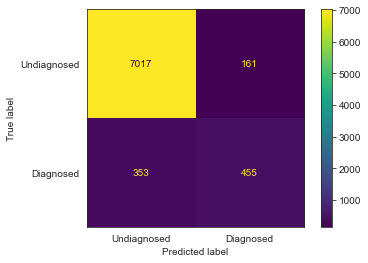

In [65]:
# Creating a confusion matrix for the base model
base_matrix = ConfusionMatrixDisplay.from_predictions(y_test, model.predict(X_test), display_labels=['Undiagnosed','Diagnosed' ])

#### Analysis
Catboost has done quite well for a baseline model! The training set has higher scores then the test set, meaning there is some overfitting occurring here. There is a very large drop in recall between the training and test set.

The model has a precision of 0.74 —in other words, **when it predicts a child is diagnosed with ADHD, it is correct 74% of the time**.

Our model has a recall of 0.56—in other words, **it correctly identifies 56% of all children with ADHD**.

The recall score, in particular needs to be improved. The class imbalance needs to be addressed before tuning. Some options:
   - Class weights
   - Over/Undersampling
   - SMOTE (Make more samples)

Catboost does support class weights, so that will be first since it is the simplest to implement.

# Addressing Class Imbalance

## Catboost - Class Weights

In [67]:
# Setting up the model
weighted_cat = CatBoostClassifier(
    # Adding Accuracy as a metric
    custom_loss=[metrics.Accuracy(), metrics.Recall(), metrics.Precision()],
    random_seed=15,
    logging_level='Silent',
    # Setting class weights to 'balanced'
    auto_class_weights='Balanced'
)

weighted_cat.fit(
    X_train, y_train,
    # Using X/y test as eval set
    eval_set=(X_test, y_test),
    # Uncomment below line to plot the learning of the model
    # plot=True
);
# Results on test set
weighted_results = custom_score(y_test, weighted_cat.predict(X_test))

Model Results
Accuracy: 0.89
Precision: 0.48
Recall: 0.85
F1: 0.61
ROC AUC: 0.87


In [68]:
# Printing changes between base model and weighted model
custom_change(FSM_results, weighted_results)

Change in Results
Accuracy        -0.05
Precision       -0.26
Recall          +0.29
F1              -0.03
ROCAUC          +0.10


### Analysis
Adding the weights flipped our model around, now precision has dropped, and recall has improved significantly. For this project, I’d prefer recall over precision because I don’t want the model to be missing kids that may have, potentially, already been passed over/ignored by doctors. I think the gain in recall and ROC/AUC is well worth the loss of precision, but let’s see the results of the other methods.

## Random Oversampling
I’m going to use the imbalanced-learn library to perform oversampling/ SMOTE techniques.

In [72]:
# Initiate Over sampler
ros = RandomOverSampler(random_state=15)

# Applying ONLY to training set to prevent data leakage.
X_train_os, y_train_os = ros.fit_resample(X_train, y_train)

In [73]:
# Setting up the model
over_cat = CatBoostClassifier(
    # Adding Accuracy as a metric
    custom_loss=[metrics.Accuracy(), metrics.Recall(), metrics.Precision()],
    random_seed=15,
    logging_level='Silent',
)

over_cat.fit(
    X_train_os, y_train_os,
    # Using X/y test as eval set
    eval_set=(X_test, y_test),
    # Uncomment below line to plot the learning of the model
    # plot=True
);

In [74]:
# Printing results on test set
os_results = custom_score(y_test, over_cat.predict(X_test))

Model Results
Accuracy: 0.92
Precision: 0.60
Recall: 0.72
F1: 0.66
ROC AUC: 0.83


In [75]:
# Printing the difference between BASE and os_results
print('Difference between Base model and model with oversampling ')
custom_change(FSM_results, os_results)

Difference between Base model and model with oversampling 
Change in Results
Accuracy        -0.01
Precision       -0.13
Recall          +0.15
F1              +0.02
ROCAUC          +0.06


In [76]:
print('Difference between Weighted model and model with oversampling ')
custom_change(weighted_results, os_results)

Difference between Weighted model and model with oversampling 
Change in Results
Accuracy        +0.03
Precision       +0.13
Recall          -0.13
F1              +0.04
ROCAUC          -0.04


### Analysis
This model seems to be a "middle ground" between the weighted model and the base model. Rather then having really high recall or precision, it has a decent score on both, and still manages to maintain a high ROC/AUC score. There is one more technique I'll try before iterating on one of these models

## SMOTEN
I'll be using the SMOTEN variant of SMOTE since it is designed specifically for categorical data.

In [77]:
# Create SMOTE object
smote = SMOTEN(random_state=15)

# Smite that training data
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [78]:
# Setting up the model
smote_cat = CatBoostClassifier(
    custom_loss=[metrics.Accuracy(), metrics.Recall(), metrics.Precision()],
    random_seed=15,
    logging_level='Silent',
)

smote_cat.fit(
    X_smote, y_smote,
    # Using X/y test as eval set
    eval_set=(X_test, y_test),
    # Uncomment below line to plot the learning of the model
    # plot=True
);

In [79]:
# Printing results on test set
smote_results = custom_score(y_test, smote_cat.predict(X_test))

Model Results
Accuracy: 0.93
Precision: 0.68
Recall: 0.57
F1: 0.62
ROC AUC: 0.77


In [81]:
# Printing the difference between FSM and os_results
print('Difference between Base model and SMOTEN model ')
custom_change(FSM_results, smote_results)

Difference between Base model and model with oversampling 
Change in Results
Accuracy        -0.01
Precision       -0.05
Recall          +0.01
F1              -0.02
ROCAUC          -0.00


In [80]:
# Compare to Oversampling results
print('Difference between random oversampling model and SMOTEN model')
custom_change(os_results, smote_results)

Change in Results
Accuracy        +0.01
Precision       +0.08
Recall          -0.15
F1              -0.03
ROCAUC          -0.06


## Smote Analysis
Smote performs slightly worse then both of the other options, in almost every way. It even manages to do worse then our first simple model. it has an advantage in precision when compared to the oversampling model, but I think SMOTEN is struggling with creating survey data.
# Class Imbalance Analysis
After checking the three suggested methods: Class weights, oversampling, and SMOTE, I'm going to use **Random Over Sampling** since it gave the most balanced results. I could try playing with the class weights a bit more, but I think it would require a lot more time, and probably won't result in an equally large increase to performance. Now, I'll perform oversampling and start the process of tuning the model.

# Hyper-parameter tuning with Optima
From here, I will be tuning our Catboost model using the [Optuna](https://optuna.readthedocs.io/en/stable/index.html) library. The library will allow me to easily test many hyper-parameters to find the optimal configuration.

In [82]:
# Importing packages needed for this section
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score
import optuna

In [83]:
# Optuna requires us to define the "objective function". Which will be called upon each iteration during our "trials"
def objective(trial):
    # Dict of Parameters to check
    param = {
        # Metric used for model optimization
        'loss_function': trial.suggest_categorical('loss_function', ['Logloss', 'CrossEntropy']),

        # The maximum number of trees that can be built.
        'iterations': trial.suggest_categorical('iterations', [100, 200, 300, 500, 1000]),

        # learning rate for gradient descent calculations.
        'learning_rate': trial.suggest_float("learning_rate", 0.001, 0.3),

        # Coefficient at the L2 regularization term of the cost function.
        'l2_leaf_reg': trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),

        # Affects the speed and regularization of tree
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS']),

        # The amount of randomness to use for scoring splits.
        'random_strength': trial.suggest_int("random_strength", 1, 10),

        # The number of splits for numerical features.
        'max_bin': trial.suggest_categorical('max_bin', [4, 5, 6, 8, 10, 20, 30]),

        # Allowed depth of tree.
        "depth": trial.suggest_int("max_depth", 2, 16),

        # Defines how to perform greedy tree construction.
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),

        # The minimum number of training samples in a leaf.
        'min_data_in_leaf': trial.suggest_int("min_data_in_leaf", 1, 10),

        # Only OHE encodes features if the number of unique values will be <= the parameter vale.
        'one_hot_max_size': trial.suggest_categorical('one_hot_max_size', [5, 10, 12, 100]),
    }

    # Certain parameters are "subparameters" and can only be set if their parent parameter has a certain value.

    # Bootstrap types
    if param['bootstrap_type'] == "Bayesian":

        # Use Baysesian bootstrapping to assign random weights to objects.
        param['bagging_temperature'] = trial.suggest_float('bagging_temperature', 0, 10)

    elif param['bootstrap_type'] in ['Bernoulli', 'MVS']:
        # Sample rate for bagging using Bernoulli/MVS type
        param['subsample'] = trial.suggest_float('subsample', 0.1, 1)

    # Grow policy params
    if param['grow_policy'] != 'SymmetricTree':

        # The minimum number of training samples in a leaf.
        param['min_data_in_leaf'] = trial.suggest_int('min_data_in_leaf', 1, 10)

        if param['grow_policy'] == 'LossGuide':
            # The maximum number of leafs in the tree.
            param['max_leaves'] = trial.suggest_int('max_leaves', 16, 64)

    # Creates the trial model with parameters specified above.
    trial_model = CatBoostClassifier(**param)

    # Fit the training model on training data
    trial_model.fit(X_train_os,
                    y_train_os,
                    eval_set=[(X_test, y_test)],
                    verbose=0,  # Stops Catboost from printing training results.
                    early_stopping_rounds=10  # Specify rounds of no improvement needed before stopping
                    )

    # Create predictions for test set
    preds = trial_model.predict(X_test)

    # Calculate recall score
    roc_auc = roc_auc_score(y_test, preds)

    return roc_auc


In [84]:
# Instantiate a "trial" object and specify we want to MAXIMIZE the value being returned by the obj function
study = optuna.create_study(direction="maximize")

# Running 100 trials, setting a timeout value of 15 minutes to prevent my computer from exploding.
study.optimize(objective, n_trials=100, timeout=900)

print("Number of finished trials: {}".format(len(study.trials)))
trial = study.best_trial

# "Prettify" our trial results
print("Best trial:")

# Print metric value achieved from best trial
print("  Value: {}".format(trial.value))

# Print all parameters from best trial
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2021-12-01 14:56:52,750] A new study created in memory with name: no-name-fc7ebedc-17ad-441d-b511-828403fe0241
[I 2021-12-01 14:57:24,571] Trial 0 finished with value: 0.8618490836963328 and parameters: {'loss_function': 'Logloss', 'iterations': 1000, 'learning_rate': 0.16064576905485917, 'l2_leaf_reg': 0.00018447028325452105, 'bootstrap_type': 'Bayesian', 'random_strength': 1, 'max_bin': 20, 'max_depth': 3, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 7, 'one_hot_max_size': 12, 'bagging_temperature': 5.220758625237006}. Best is trial 0 with value: 0.8618490836963328.
[I 2021-12-01 14:58:32,149] Trial 1 finished with value: 0.7948734306420332 and parameters: {'loss_function': 'Logloss', 'iterations': 200, 'learning_rate': 0.22540741972196893, 'l2_leaf_reg': 0.12489798575261435, 'bootstrap_type': 'MVS', 'random_strength': 8, 'max_bin': 5, 'max_depth': 9, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 1, 'one_hot_max_size': 100, 'subsample': 0.5563394730991794}. Best is trial 

Number of finished trials: 13
Best trial:
  Value: 0.8687289476370317
  Params: 
    loss_function: Logloss
    iterations: 1000
    learning_rate: 0.03203600485274493
    l2_leaf_reg: 0.02674212397672798
    bootstrap_type: Bernoulli
    random_strength: 1
    max_bin: 5
    max_depth: 3
    grow_policy: Depthwise
    min_data_in_leaf: 4
    one_hot_max_size: 100
    subsample: 0.9436279607410641


In [86]:
# Create a model with the parameters from our best trial
final_model = CatBoostClassifier(verbose=False, **trial.params)
final_model.fit(X_train_os, y_train_os)

# Results
 Before performing analysis let's look at the results, the confusion matrix, and the ROC Curve.

In [87]:
# Importing required packages for this section
from sklearn.metrics import RocCurveDisplay

In [88]:
# Show custom metrics
final_results = custom_score(y_test, final_model.predict(X_test))

Model Results
Accuracy: 0.90
Precision: 0.49
Recall: 0.84
F1: 0.62
ROC AUC: 0.87


In [89]:
# Printing the difference between the oversample model, and the tuned oversample model.
print('Difference between Tuned Model and Un-tuned Model')
custom_change(os_results, final_results)

Difference between Tuned Model and Un-tuned Model
Change in Results
Accuracy        -0.03
Precision       -0.11
Recall          +0.12
F1              -0.04
ROCAUC          +0.04


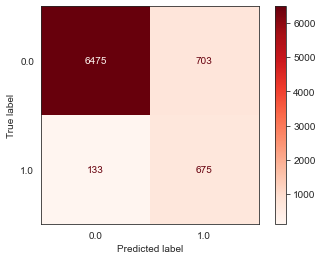

In [94]:
# Creating a confusion matrix for the final model
final_matrix = ConfusionMatrixDisplay.from_predictions(y_test, final_model.predict(X_test), cmap='Reds')

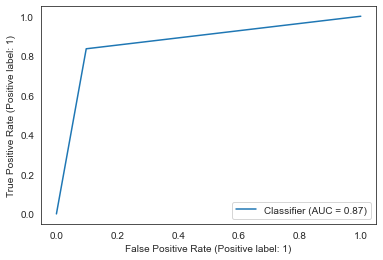

In [96]:
final_roc_curve = RocCurveDisplay.from_predictions(y_test, final_model.predict(X_test))

# Conclusion

# Next Steps